In [1]:
## processing
import random
import numpy as np

## visualization
import matplotlib.pyplot as plt

## Defining microtubule length using negative binomial distribution

In [9]:
lMT = np.random.negative_binomial(1, 0.9, size=100) + 1

In [10]:
d_lMT = {}
for i in range(1, max(lMT)+1):
    d_lMT[i] = np.count_nonzero(lMT == i)

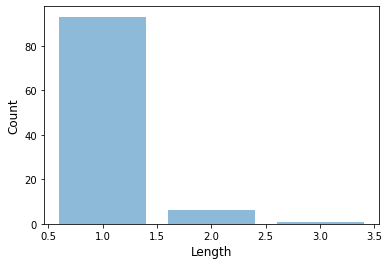

In [11]:
fig, ax = plt.subplots()
ax.bar(d_lMT.keys(), d_lMT.values(), align='center', alpha=0.5)
ax.set_xlabel('Length', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

In [2]:
file = open('template.cym', 'r')
lines = file.readlines()

In [ ]:
with open('config.cym', 'w') as f:
    for line in lines[:28]:
        f.write(line)
    for length,count in d_lMT.items():
        f.write('new {} microtubule'.format(count))
        f.write("\n{\n")
        f.write("\tlength = {}".format(length))
        f.write("\n}\n\n")
    for line in lines[33:]:
        f.write(line)

In [19]:
file = open('template.cym', 'r')
lines = file.readlines()

fdir = '../simulation/percolation/run-series10/'
file_number = 0

for p in np.arange(0.4, 0.91, 0.1):
    print(p)
    for n in range(3):
        lMT = np.random.negative_binomial(1, p, size=1000) + 1

        d_lMT = {}
        for i in range(1, max(lMT)+1):
            d_lMT[i] = np.count_nonzero(lMT == i)

        fname = 'config{}.cym'.format((4-len(str(file_number)))*'0'+str(file_number))
        with open(fdir+fname, 'w') as f:
            for line in lines[:28]:
                f.write(line)
            for length,count in d_lMT.items():
                f.write('new {} microtubule'.format(count))
                f.write("\n{\n")
                f.write("\tlength = {}".format(length))
                f.write("\n}\n\n")
            for line in lines[33:]:
                f.write(line)
    
        file_number += 1

0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999


## Orientation sorting

In [3]:
orientations = []
for i in range(1, 11):
    for j in range(1, 11):
        orientations.append('{} {} 0'.format(i, j))

In [29]:
positions = []
gap = 3
for i in range(-12, 13, gap):
    for j in range(-12, 13, gap):
        positions.append('{} {} 0'.format(i, j))

In [30]:
num_MT = int(1000 / len(positions))
num_MT

12

In [32]:
file = open('template.cym', 'r')
lines = file.readlines()

In [33]:
with open('../simulation/orientation/config0002.cym', 'w') as f:
    for line in lines[:28]:
        f.write(line)
    for i in range(3):
        for position in positions:
            orientation = random.choice(orientations)
            f.write('new {} microtubule\n'.format(num_MT))
            f.write("{\n")
            f.write("\tlength = 1\n")
            f.write("\tposition = {}\n".format(position))
            f.write("\torientation = {}\n".format(orientation))
            f.write("\n}\n\n")
    for line in lines[33:]:
        f.write(line)

In [11]:
l_MT = np.arange(1, 10, 1)
file = open('template.cym', 'r')
lines = file.readlines()

fdir = '../simulation/orientation/series1/'
file_number = 0

for l in l_MT:
    positions = []

    gap = l + 1
    for i in range(-12, 13, gap):
        for j in range(-12, 13, gap):
            positions.append('{} {} 0'.format(i, j))
    
    num_MT = int(1000 / len(positions))

    fname = 'config{}.cym'.format((4-len(str(file_number)))*'0'+str(file_number))
    with open(fdir+fname, 'w') as f:
        for line in lines[:28]:
            f.write(line)
        for i in range(3):
            for position in positions:
                orientation = random.choice(orientations)
                f.write('new {} microtubule\n'.format(num_MT))
                f.write("{\n")
                f.write("\tlength = {}\n".format(l))
                f.write("\tposition = {}\n".format(position))
                f.write("\torientation = {}\n".format(orientation))
                f.write("\n}\n\n")
        for line in lines[33:]:
            f.write(line)
    
    file_number += 1